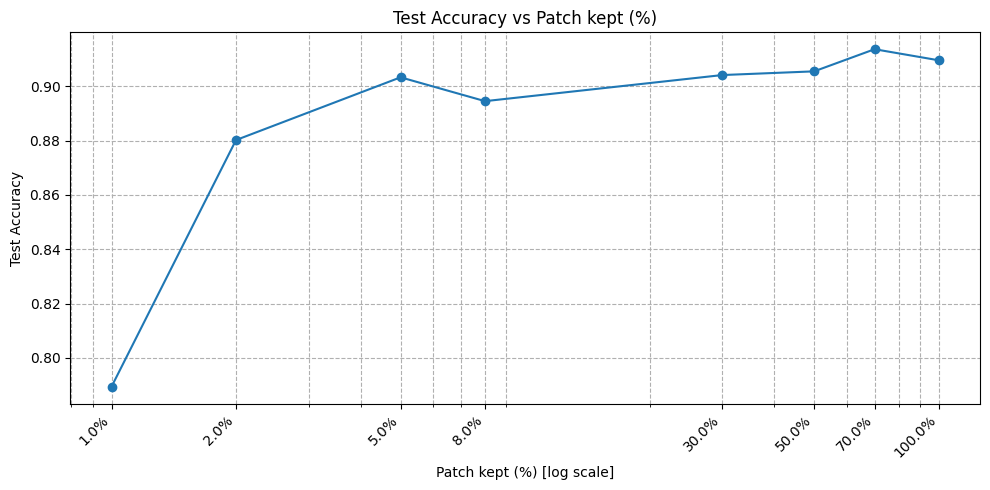

In [1]:
import wandb
import re
import matplotlib.pyplot as plt

# Inizializza l'API W&B
api = wandb.Api()

# Nome del progetto W&B
project_name = "vit-ucb-pruning3"
entity_name = 'vincenzo-civale-universi-degli-studi-di-firenze'  # se non hai entity, lascia None

# Lista di run
runs = api.runs(f"{entity_name}/{project_name}" if entity_name else project_name)

kept_values = []
accuracies = []

for run in runs:
    run_name = run.name
    match = re.search(r"UCB-(\d*\.?\d+)", run_name)
    if match:
        kept_percent = float(match.group(1)) * 100

        # Recupera i summary: contiene i valori finali di test
        if "test/accuracy" in run.summary:
            acc = run.summary["test/accuracy"]
            kept_values.append(kept_percent)
            accuracies.append(acc)

# Ordina i dati
if kept_values and accuracies:
    kept_values, accuracies = zip(*sorted(zip(kept_values, accuracies)))

    plt.figure(figsize=(10, 5))
    plt.plot(kept_values, accuracies, marker='o', label="Runs")
    plt.xscale("log")  # scala logaritmica sulle x
    plt.xlabel("Patch kept (%) [log scale]")
    plt.ylabel("Test Accuracy")
    plt.title("Test Accuracy vs Patch kept (%)")
    plt.grid(True, which="both", ls="--")

    plt.xticks(kept_values, [f"{v:.1f}%" for v in kept_values], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("Nessun dato trovato con 'test/accuracy'.")
